In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [2]:
data = pd.read_csv('../../assets/dataset/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [18]:
# TODO
df_store1=data[data.Store==1]

#df_store1.describe()
df_dept_agg=df_store1.groupby(['Dept','Date']).sum()
print df_dept_agg.head(10)

            Weekly_Sales  IsHoliday
Dept Store                         
1    1        3219405.18       10.0
2    1        6592598.93       10.0
3    1        1880518.36       10.0
4    1        5285874.09       10.0
5    1        3468885.58       10.0
6    1         686654.56       10.0
7    1        3513007.70       10.0
8    1        5107710.84       10.0
9    1        4012873.47       10.0
10   1        4437774.25       10.0


#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

In [56]:
d1= df_store1[['Weekly_Sales']].resample('W').sum()

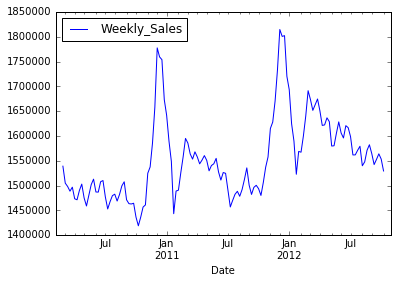

In [57]:
# TODO
d1[['Weekly_Sales']].resample('W').mean().rolling(window=7, center=True).mean().plot()

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [58]:
# TODO
d1.Weekly_Sales.autocorr(lag=1)

0.30215827941131307

In [59]:
d1.Weekly_Sales.autocorr(lag=2)

0.12741313055390155

In [60]:
d1.Weekly_Sales.autocorr(lag=52)

0.89537602947770045

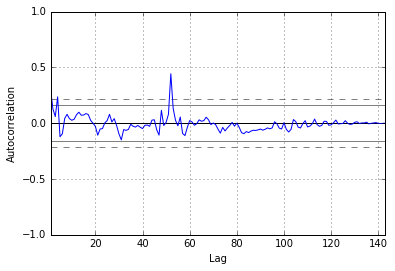

In [63]:
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline
import matplotlib.pyplot as plt

autocorrelation_plot(d1.Weekly_Sales)
#autocorrelation_plot?

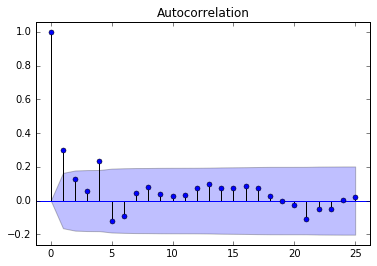

In [61]:
# TODO
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(d1.Weekly_Sales, lags=25)
plt.show()

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [69]:
# TODO

#df_store1['stop-year']=pd.DatetimeIndex(df_store1['Date Of Stop']).year
#df_store1['stop-month']=pd.DatetimeIndex(df_store1['Date Of Stop']).month
#df_store1[['Weekly_Sales']].resample('W').
#d1.tail(100)
d_train=d1.ix['2010-02-07':'2012-04-08']
d_test=d1.ix['2012-04-15':'2012-10-28']

In [72]:
d_test.describe()

,Weekly_Sales
count,2.900000e+01
mean,1.571676e+06
std,8.107472e+04
min,1.437059e+06
25%,1.508069e+06
50%,1.573073e+06
75%,1.624478e+06
max,1.769854e+06


In [51]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_store1, test_size = 0.25,random_state=0)


In [52]:
test.tail()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-06-08,1,6,4888.46,False
2010-02-05,1,3,13740.12,False
2011-10-14,1,41,1262.47,False
2011-05-06,1,55,10456.91,False
2011-06-10,1,5,18648.73,False


In [53]:
train_test_split?

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [73]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [ ]:
# TODO
from statsmodels.tsa.arima_model import ARMA

store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 0)).fit()
print model.summary()

#### Plot the residuals - where are their significant errors.

In [ ]:
# TODO

In [ ]:
# TODO

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [ ]:
# TODO

In [ ]:
# TODO

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [ ]:
# TODO